# **Week 13. Transformer**

## **Table of Contents**
+ Task 1 : Implement Positional Encoding
+ Task 2 : Implement Attention in Transformer
+ Task 3 : (Optional) Application of Transformer

##**Task 1 : Implement positional encoding**

---



### **1-1. Structure of Transformer**

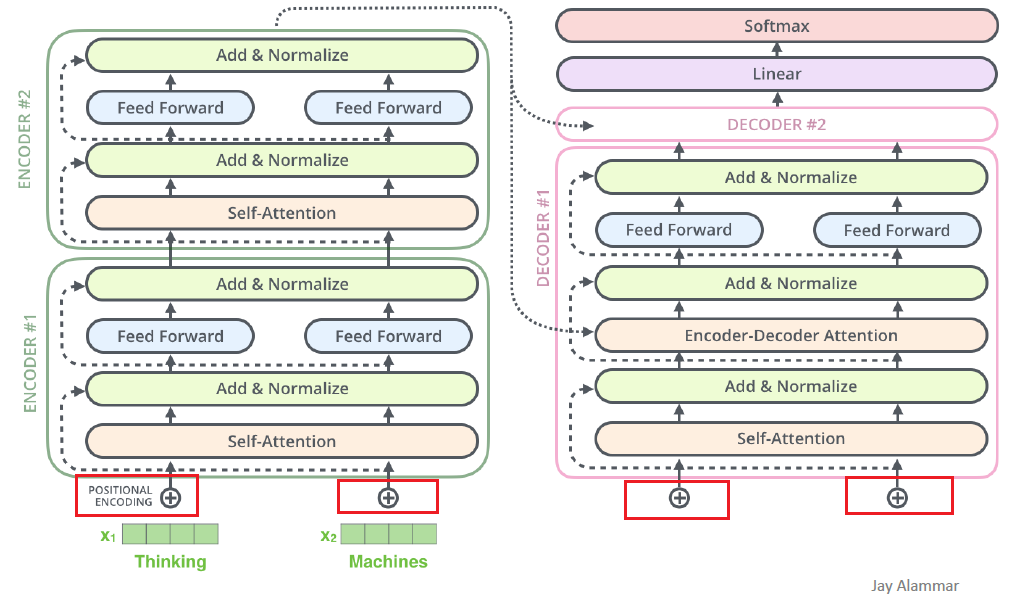

- Transformer uses a combination of Input Embedding and Positional Encoding.
- Input Embedding and Positional Encoding are used on both the encoder and decoder side.

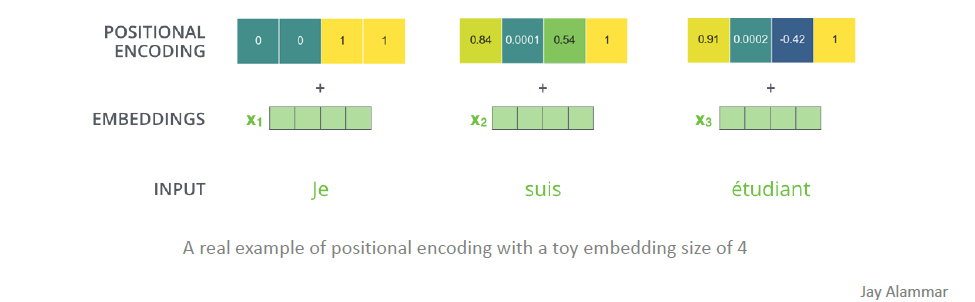

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

- In order to understand input sequence, information about the relative/absolute position in the order of the tokens must be embedded.
- In today's practice session, you have to build Positional Encoding(PE) table.
- PE table is matrix of size $m\times{d_{model}}$ , where $m$ is the number of words in the sentence and $d_{model}$ is the dimension of embedding vector. 
- $j^{th}$ row of the PE table corresponds to the positional encoding vector($\in R^{d_{model}}$) of the $j^{th}$ position.
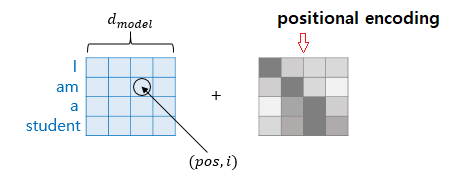

- According to the authors, they use sine and cosine functions of different frequencies:
$$ PE_{(pos,2i)} = sin(pos/10000^{2i/d_{model}})$$
$$ PE_{(pos,2i+1)} = cos(pos/10000^{2i/d_{model}})$$
  - where $pos$ is the position and $i$ is the dimension. That is, each dimension of the positional encoding corresponds to a sinusoid.
  - If the index of dimension is even, the sine function is used. On the other hand, if the index of dimension is odd, the cosine function is used.

In [2]:
""" sinusoid position embedding """
def get_potisional_encoding_table(n_seq, d_hidn):
    def get_angle(position, i): # Compute the angle which is the input for sine/cosine fuction
        ###################################### Write your code here ##########################################
        return 
        #######################################################################################################
    PE_table = np.zeros((n_seq, d_hidn))
    for pos in range(n_seq):
      for i in range(d_hidn):

        if i%2 == 0: # i is even -> sine function
        ###################################### Write your code here ##########################################
          PE_table[pos,i] = 
        #######################################################################################################
        elif i%2 == 1: # i is odd -> cosine function
        ###################################### Write your code here ##########################################
          PE_table[pos,i] = 
        #######################################################################################################
 
    return PE_table

(64, 128)


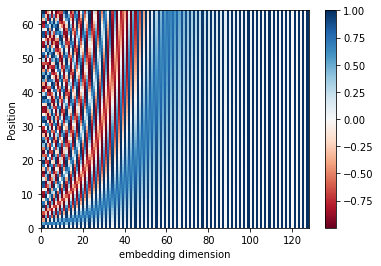

In [3]:
n_seq = 64 # the number of words in the sentence
d_hidn = 128 # dimension of embedding vector.
pos_encoding = get_potisional_encoding_table(n_seq, d_hidn)

print (pos_encoding.shape) 
plt.pcolormesh(pos_encoding, cmap='RdBu')
plt.xlabel('embedding dimension')
plt.xlim((0, d_hidn))
plt.ylabel('Position')
plt.colorbar()
plt.show()

##**Task 2 : Implement Attention in Transformer**

Tranformer is the model relying entirely on ``self-attention`` to compute representations of its input and output without using sequence-aligned RNNs or convolution.





###**2-1. Scaled Dot-Product Attention**
An attention function can be described as mapping a query and a set of key-value pairs to an output, where the query, keys, values, and output are vectors. Transformer uses particular attention called ``Scaled Dot-Product Attention``.
- The input consists of queries and keys of dimentsion $d_k$ and values of dimension $d_v$.
- We compute the dot products of the query with all keys, divide each by $\sqrt{d_k}$, and apply a softmax function to obtain the weights on the values.
- We compute the attention function on a set of queries simultaneously, packed together into a matrix $Q$. The keys and values are also packed together into matrices $K$ and $V$ : 

\begin{equation}
\text{Attention}(Q, K, V) = \text{softmax}\left(\frac{QK^\top}{\sqrt{d_k}}\right)V \tag{1}
\end{equation}
where  $Q = XW_Q, K=XW_K, V=XW_V$ and $X$ is the embedded vectors.
We will use pretrained weights $W_Q, W_K, W_V$ from bert-base-uncased model.\
($W_Q, W_K, W_V \in \mathbb{R}^{d_{model} \times d_{model}}$).

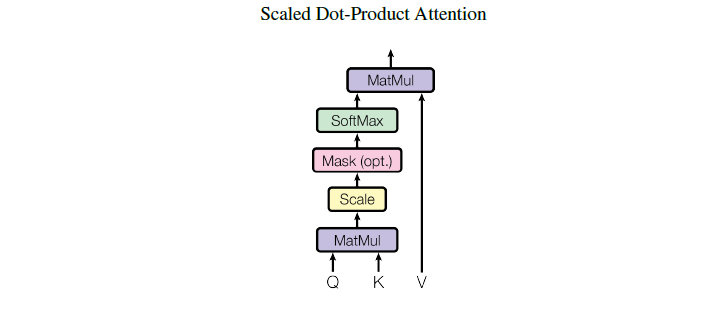

- Write your scaled dot product attention function according to the equation (1).
- Hint : When you transpose $K$, use ``key.transpose(-1,-2)``

  - scores = $\frac{QK^\top}{\sqrt{d_k}}$
  - $\text{attn}$ = $\text{softmax}$(scores)
  - context = $\text{matmul}(\text{attn},V)$

In [4]:
def scaled_dot_product_attention(query, key, value):
  #query = [batch_size x n_heads x len_q x d_k]
  #key = [batch_size x n_heads x len_k x d_k]
  #value = [batch_size x n_heads x len_v x d_k]
  
  d_k = key.size(-1)
  ###################################### Write your code here ##########################################
  scores = 
  attn = 
  context = 
  #######################################################################################################
  
  return context, attn

###**2-2.Visualization of Self-Attention**

The Transformer uses attention in three different ways : ``self-attention in encoder``, ``encoder-decoder attention``, ``self-attention in decocer``.\
In this practice, we will visulize one self-attention layer in encoder. In a self-attention layer, all of the keys, values, and queries come from the same output of the previous layer.\
We will use pretrained bert model which has same structure with the encoder of transformer. Check your attention map.


In [5]:
!pip install bertviz

     |████████████████████████████████| 153kB 27.9MB/s 
     |████████████████████████████████| 1.2MB 30.7MB/s 
     |████████████████████████████████| 2.3MB 38.6MB/s 
     |████████████████████████████████| 102kB 11.1MB/s 
     |████████████████████████████████| 3.3MB 38.1MB/s 
     |████████████████████████████████| 901kB 45.8MB/s 
     |████████████████████████████████| 7.6MB 41.6MB/s 
     |████████████████████████████████| 81kB 8.9MB/s 
  Created wheel for boto3: filename=boto3-1.17.80-py2.py3-none-any.whl size=128919 sha256=1e798d3176cf29886a8ee3c7e4468ac37610225538089d35c45452d43dff25c2
  Stored in directory: /root/.cache/pip/wheels/dc/9f/b0/342fe7c9ff632bf49e3a90cd8cf481de74f3475691865158e7
Successfully built boto3
ERROR: botocore 1.20.80 has requirement urllib3<1.27,>=1.25.4, but you'll have urllib3 1.24.3 which is incompatible.


In [6]:
batch_size = 1
n_heads = 12 #each encoder layer has 12 heads
d_model = 768 #dimension of embedding vector. 
d_k = d_v = 64

In [7]:
# Load pretrained model

from transformers import BertTokenizer, BertModel
model_version = 'bert-base-uncased'
do_lower_case = True
model = BertModel.from_pretrained(model_version, output_attentions=True)
tokenizer = BertTokenizer.from_pretrained(model_version, do_lower_case=do_lower_case)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [8]:
#You can change sentence anything you want.
sentence = 'Tom was born in 1912 and he died in 1954.'

- In Bert Model, there are 12 encoder layers and in each layer 12 heads exist. We will extract the first head attention of the first encoder layer and visualize it.

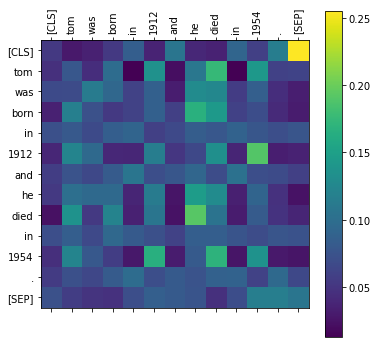

In [9]:
#Embedding
inputs = tokenizer.encode_plus(sentence, return_tensors='pt', add_special_tokens=True)
token_type_ids = inputs['token_type_ids']
input_ids = inputs['input_ids']
input_id_list = input_ids[0].tolist()
tokens = tokenizer.convert_ids_to_tokens(input_id_list)

emb_sentence = model.embeddings(input_ids) #shape = [batch_size, seq_len, d_model]

#Self-Attention
#Query, Key, Value Matrix
#Using first layers (There are total 12 layers)
W_Q = model.encoder.layer[0].attention.self.query
W_K = model.encoder.layer[0].attention.self.key
W_V = model.encoder.layer[0].attention.self.value

query = W_Q(emb_sentence).view(1,-1,n_heads,d_k).transpose(1,2)
key = W_K(emb_sentence).view(1,-1,n_heads,d_k).transpose(1,2)
value = W_V(emb_sentence).view(1,-1,n_heads,d_v).transpose(1,2)


###############Use your scaled_dot_product_attention function#################
context, attn = 
##############################################################################

#Show the first head of first encoder's selt-attention layer.
attn = attn.squeeze(0)[0].data.numpy()
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1, 1, 1)
img = ax.matshow(attn, cmap='viridis')
ax.set_xticks(np.arange(len(attn)))
ax.set_yticks(np.arange(len(attn)))
ax.set_xticklabels(tokens, rotation=90)
ax.set_yticklabels(tokens)
fig.colorbar(img)
plt.show()

- You can also visualize all attention patterns in a particular layer in the model with ``head_view``. \
The colors correspond to different attention heads.

In [10]:
from bertviz import head_view
attention = model(input_ids, token_type_ids=token_type_ids)[-1]
head_view(attention,tokens)

<IPython.core.display.Javascript object>

##**Task 3 : (Optional) Application of Transformer**

To utilize transformers for specific tasks, fine-tuning is needed. Fortunately, `transformers` module provides a large number of models and tokenizers for various purposes.
More than 9,000 models are found in [Hugging Face homepage](https://huggingface.co/models). `from_pretrained()` method can be used to load models and tokenizers you want.
The `pipeline()` is useful when loading model and tokenizer for specific task. The following are the pipelines provided by `transformers`.


- AutomaticSpeechRecognitionPipeline
- ConversationalPipeline
- FeatureExtractionPipeline
- FillMaskPipeline
- ImageClassificationPipeline
- QuestionAnsweringPipeline
- SummarizationPipeline
- TextClassificationPipeline
- TextGenerationPipeline
- TokenClassificationPipeline
- TranslationPipeline
- ZeroShotClassificationPipeline
- Text2TextGenerationPipeline

For more details about pipelines, refer to [here](https://huggingface.co/transformers/main_classes/pipelines.html) and [here](https://colab.research.google.com/github/huggingface/transformers/blob/master/notebooks/03-pipelines.ipynb#scrollTo=-HLOHXuArl_L)

###**3-1.Mask Filling Pipeline**
Mask filling pipeline is used to predict the masked word of given text. For example, when the text `I want to <mask> fried chicken.` is given, the model can predict that the '\<mask>' is 'eat'. `ModelWithLMHead.from_pretrained()` and `Tokenizer.from_pretrained()` can be used together to load model and tokenizer for this purpose. But more easily, you can do this in only one line with `pipeline()` method. You can specify model and tokenizer you want to use. But even when they are omitted, default model and tokenizer are chosen. Thus, following are all possible.
```python
    model = pipeline('fill-mask')
    model = pipeline('fill-mask', model='<model_name>')
    model = pipeline('fill-mask', model='<model_name>', tokenizer='<tokenizer_name>')
```

In [11]:
from transformers import pipeline

# Load mask filling model
fill_mask = pipeline('fill-mask')

In [12]:
mask = fill_mask.tokenizer.mask_token   # mask token

# Change text to anything you want and check the result.
# There must be one mask in text.
text = 'I ' + mask + ' you.'

# Predict the most probable words for the mask.
fill_mask(text)

[{'score': 0.24132734537124634,
  'sequence': 'I salute you.',
  'token': 23824,
  'token_str': ' salute'},
 {'score': 0.17694082856178284,
  'sequence': 'I miss you.',
  'token': 2649,
  'token_str': ' miss'},
 {'score': 0.1473005712032318,
  'sequence': 'I love you.',
  'token': 657,
  'token_str': ' love'},
 {'score': 0.05995551496744156,
  'sequence': 'I thank you.',
  'token': 3392,
  'token_str': ' thank'},
 {'score': 0.0465141125023365,
  'sequence': 'I applaud you.',
  'token': 19477,
  'token_str': ' applaud'}]

###**3-2.Conversational Pipeline**

Conversational pipelines are used for multi-turn conversation task. Thus, the model generates an appropriate response to your input text. It can be loaded with `pipeline('conversational')`.

In [13]:
from transformers import pipeline, logging

logging.set_verbosity_error()

# Load conversational pipeline.
conv = pipeline('conversational')

When using conversational pipeline, `Conversation` class is needed to contain a conversation and its history. Conversational pipeline predicts the response based on the history stored in `Conversation` module.

In [14]:
from transformers import Conversation

print("Start conversation with bot. Press enter key if you want to quit.")
print("=================================================================")

# Your first input for conversation
first_conv = input("You : ")
my_conv = Conversation(first_conv)

while True:
    # Conversational pipeline generates a response to your input.
    # And store the response in my_conv module as history.
    response = conv(my_conv).generated_responses
    if isinstance(response, list):
        response = response[-1]
    
    # Print the response from bot
    print("bot :", response)

    # Your next input
    new_conv = input("You : ")

    # Press Enter key to escape.
    if new_conv == '':
        break

    my_conv.add_user_input(new_conv)

print("Conversation finished.")


Start conversation with bot. Press enter key if you want to quit.
You : hello
bot : Hello! :D
You : nice to meet you
bot : Nice to meet you too!


KeyboardInterrupt: ignored

###**3-3.Text Generation in Korean**
Text generation is to predict the words that will follow given text. Hugging Face provides a various kinds of models in more than 100 languages. It offers models for Korean language as well. In this practice, we will load and test one of those Korean language models. ([kykim/gpt3-kor-small_based_on_gpt2](https://huggingface.co/kykim/gpt3-kor-small_based_on_gpt2)). We don't use `pipeline('text-generation')` this time, because this model doesn't support it. Instead, we load model and tokenizer directly using `from_pretrained()` method.


In [15]:
from transformers import GPT2LMHeadModel, BertTokenizerFast

# Load model and tokenizer for Korean text generation
model_name = 'kykim/gpt3-kor-small_based_on_gpt2'

model = GPT2LMHeadModel.from_pretrained(model_name)
tokenizer = BertTokenizerFast.from_pretrained(model_name)

In [16]:
# Change text to anything you want and check the result
text = "여러분,"
token = tokenizer.encode(text, return_tensors='pt')[:, 1:] # remove class token
token

tensor([[15563,  2014,     3]])

In [17]:
# Generate following words
output = model.generate(token, repetition_penalty=10.)

print(tokenizer.decode(output[0], skip_special_tokens=True))

여러분, 이 글을 읽는 모든 분들! 모두 건강하세요. ^ - _ * ) / (


## References

1) https://nlp.seas.harvard.edu/2018/04/03/attention.html

2) https://github.com/jessevig/bertviz

3) https://huggingface.co/transformers/notebooks.html

4) https://huggingface.co/models

5) https://huggingface.co/kykim/gpt3-kor-small_based_on_gpt2

6) https://catsirup.github.io/ai/2020/04/09/transformer-code.html